In [29]:
# Biblioteker
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [30]:
# Utregning av bane
festepunkter_x = np.arange(0, 1400+200, 200)
festepunkter_y = np.array([300, 247, 159, 159, 195, 190, 131, 152,])
# festepunkter_y = np.array([300, 258, 171, 175, 242, 257, 202, 190]) # Oppgavesettets verdier

x = np.arange(0, 1400+1, 1)

cs = CubicSpline(festepunkter_x,festepunkter_y,bc_type='natural')
y = cs(x)
dy = cs(x,1)
ddy = cs(x,2)

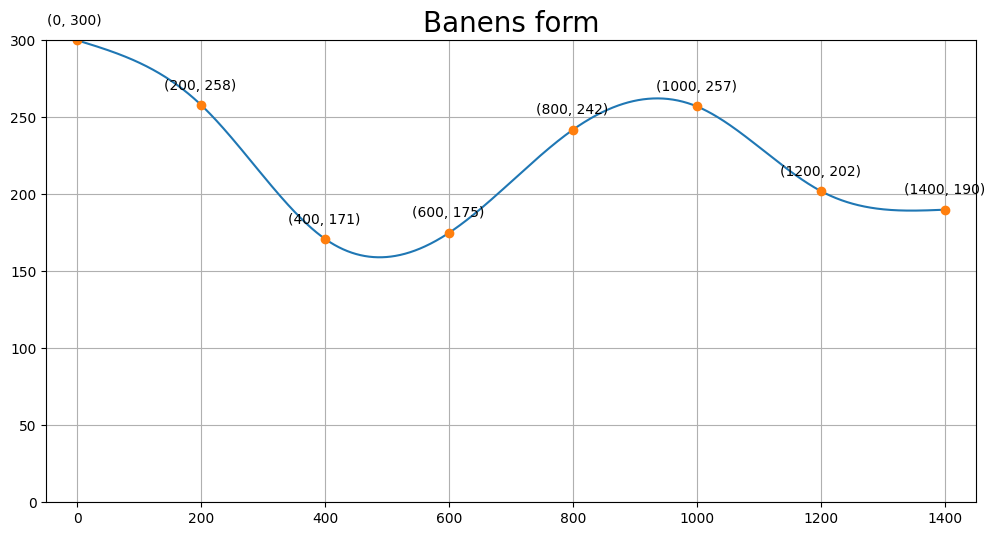

In [31]:
# Plot av banen y(x)
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Banens form', fontsize=20)
plt.plot(x,y,festepunkter_x,festepunkter_y,'o')
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()

for i, j in zip(festepunkter_x, festepunkter_y):
   strlen = len(f"({str(i)}, {str(j)})")
   plt.text(i-strlen*6, j+10, '({}, {})'.format(i, j))

plt.show()

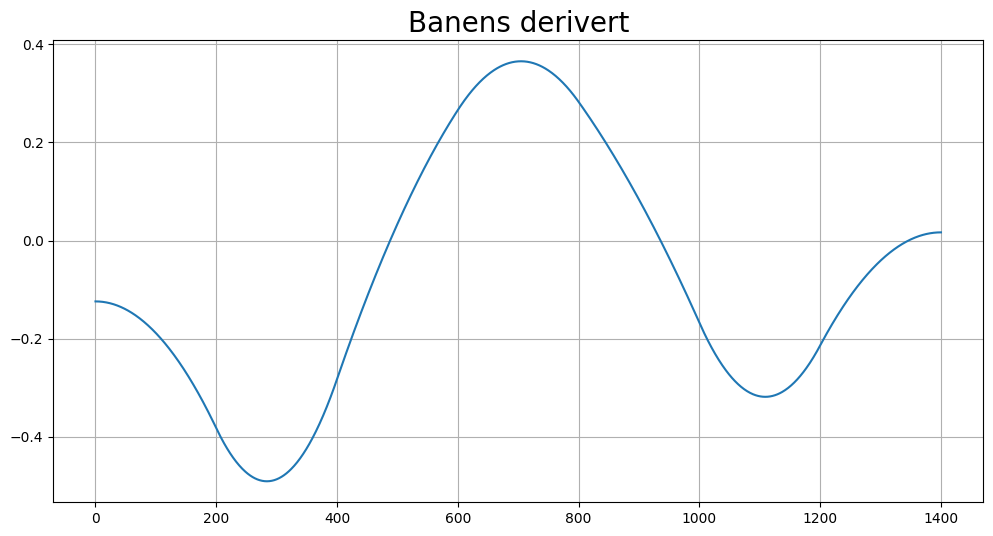

In [32]:
# Plot av derivert av bane
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Banens derivert', fontsize=20)
plt.plot(x,dy)
plt.grid()
plt.show()

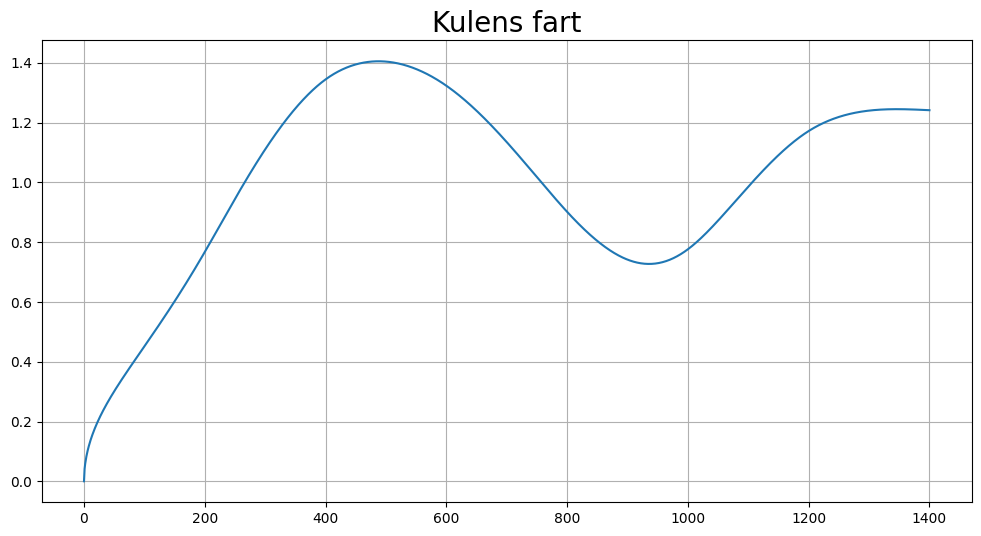

In [33]:
# Plot av kulas fart
def kfart(banehøyde):
    g = 9.81
    y0 = 0.3 # m
    c = 2 / 5 # Fra oppgavetekst
    return np.sqrt(2*g*(y0-(banehøyde/1000))/(1+c))

baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Kulens fart', fontsize=20)
plt.plot(x, kfart(y))

plt.grid()
plt.show()

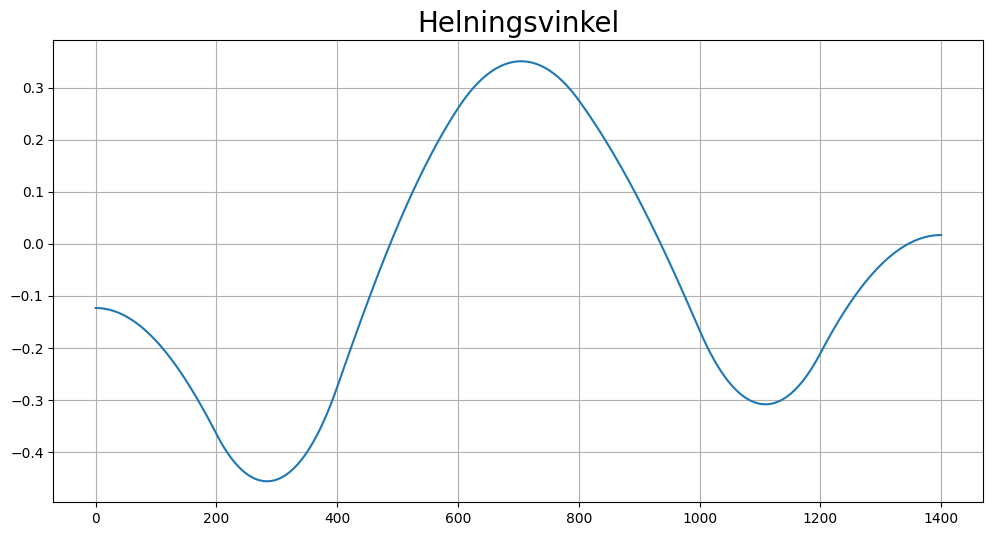

In [34]:
# Plot av helningsvinkel
def helning(dy):
    return np.arctan(dy)

baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Helningsvinkel', fontsize=20)
plt.plot(x, helning(dy))

plt.grid()
plt.show()

In [35]:
# Tidsutvikling
def dt(n):
    dx = 0.001 # mm -> m
    fart = kfart(y[n])
    fart_next = kfart(y[n+1])
    return (2 * dx) / ((fart + fart_next) * abs(np.cos(helning(dy[n]))))
dt_arr = [dt(i) for i in range(0, len(x)-1)]

In [36]:
# Total tid
tid = sum(dt_arr)

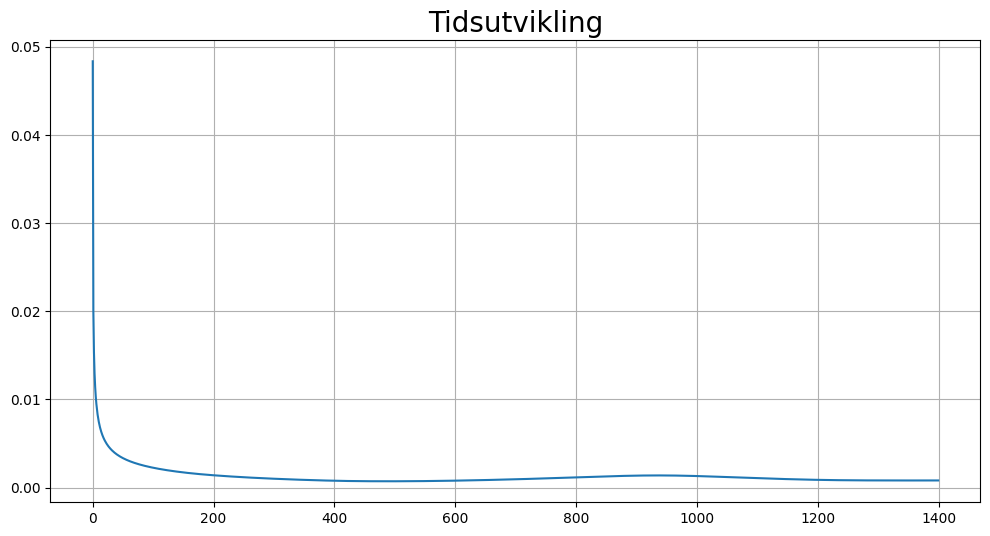

In [37]:
# Plot av tidsutvikling
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Tidsutvikling', fontsize=20)
plt.plot(x[:-1], dt_arr)
plt.grid()

plt.show()

In [38]:
# Utregning av kinetisk energi i sluttpunktet
m = 0.031
c = 2 / 5
E = (1+c)*m*kfart(cs(x[-1])/1000)**2/2
print(E)

0.09117521910000002


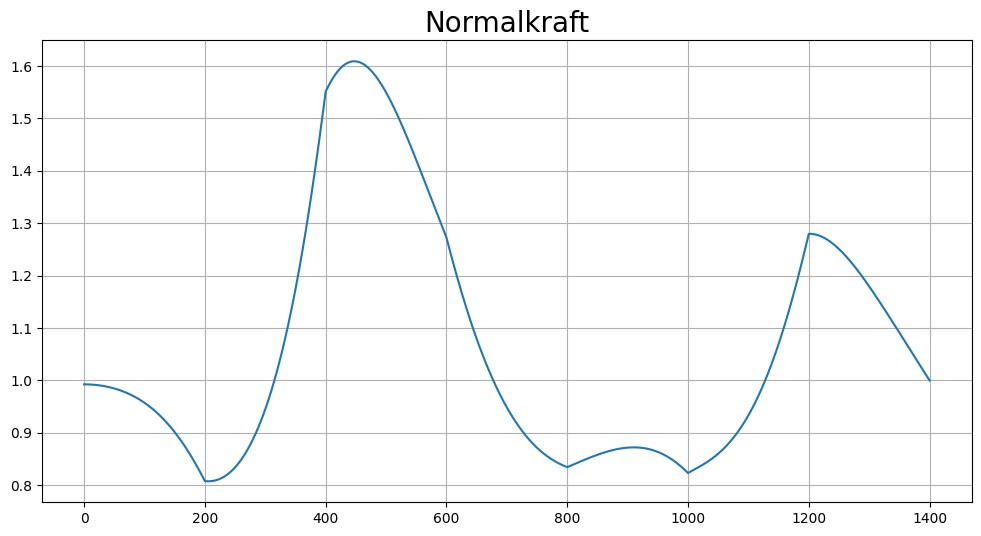

In [39]:
def Normalkraft(n):
    m = 0.031
    c = 2/5
    g = 9.81
    y_0 = y[0]
    sentrip = (2*g*(y_0 - y[n])/(1+c)) * ddy[n]/(1+(dy[n]**2))**(3/2)
    return m*(g*np.cos(helning(dy[n]))+sentrip)

# Plott av normalkraft
plt.figure('y(x)',figsize=(12,6))
plt.title('Normalkraft', fontsize=20)
plt.plot(x, Normalkraft(x)/(m*9.81))
plt.grid()